In [194]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [195]:

def generate_polygon(n):
    angles = np.sort(np.random.uniform(0, 2 * np.pi, n))

    point_distances = np.random.uniform(3, 10, n)

    points = np.column_stack([point_distances * np.cos(angles), point_distances * np.sin(angles)])
    points += np.random.uniform(-2, 2, 2)
    return points


def is_point_inside_angle_method(polygon, point):
    total_angle = 0
    n = len(polygon)
    for i in range(n):
        # векторы от точки до вершин
        p1 = polygon[i] - point
        p2 = polygon[(i + 1) % n] - point
        p1_norm = np.linalg.norm(p1)
        p2_norm = np.linalg.norm(p2)
        if p1_norm == 0 or p2_norm == 0: return True
        angle_cos = np.clip(np.dot(p1, p2) / (p1_norm * p2_norm), -1.0, 1.0)
        cross_product = np.cross([p1[0], p1[1], 0], [p2[0], p2[1], 0])
        if cross_product[2] > 1e-6:
            total_angle += np.arccos(angle_cos)
        else:
            total_angle -= np.arccos(angle_cos)
    return abs(total_angle - 2 * np.pi) < 1e-6 or abs(total_angle + 2 * np.pi) < 1e-6


def is_point_inside_ray_method(polygon, point):
    x, y = point
    n = len(polygon)
    inside = False
    for i in range(n):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % n]
        
        if x == x1 and y == y1: return True
        if x == x2 and y == y2: return True
        # если по y вершины по разные стороны от луча
        if (((y1 > y) != (y2 > y))
                and (x < (x2 - x1) * (y - y1) / (y2 - y1) + x1)):
            inside = not inside
    return inside


n = 15
k = 100
# np.random.seed(100)

polygon = generate_polygon(n)
points = np.random.uniform(-10, 10, (k, 2))
# polygon = np.array([[0, 0], [2, 0], [3, 5], [5, 5], [5, 10], [0, 10]])
# points = np.array([[2,5]])
angle_results = [is_point_inside_angle_method(polygon, p) for p in points]
ray_results = [is_point_inside_ray_method(polygon, p) for p in points]




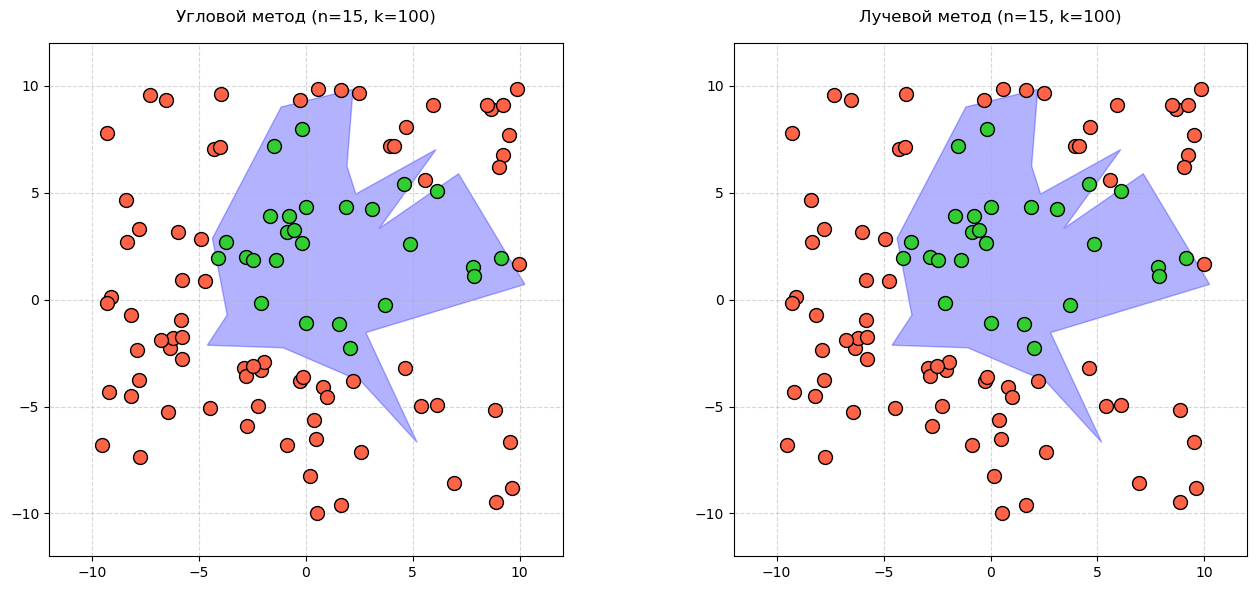

In [196]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot(1, 2, 1)
polygon_patch = Polygon(polygon, closed=True, alpha=0.3, color='blue')
ax1.add_patch(polygon_patch)

for i, (p, res) in enumerate(zip(points, angle_results)):
    color = 'limegreen' if res else 'tomato'
    ax1.scatter(p[0], p[1], c=color, s=100, edgecolors='k', zorder=4)

ax1.set_title(f'Угловой метод (n={n}, k={k})', pad=15)
ax1.grid(True, ls='--', alpha=0.5)
ax1.set_aspect('equal')
ax1.set_xlim(-12, 12)
ax1.set_ylim(-12, 12)

ax2 = plt.subplot(1, 2, 2)
polygon_patch = Polygon(polygon, closed=True, alpha=0.3, color='blue')
ax2.add_patch(polygon_patch)

for i, (p, res) in enumerate(zip(points, ray_results)):
    color = 'limegreen' if res else 'tomato'
    ax2.scatter(p[0], p[1], c=color, s=100, edgecolors='k', zorder=4)

ax2.set_title(f'Лучевой метод (n={n}, k={k})', pad=15)
ax2.grid(True, ls='--', alpha=0.5)
ax2.set_aspect('equal')
ax2.set_xlim(-12, 12)
ax2.set_ylim(-12, 12)

plt.tight_layout()
plt.show()
